<a href="https://colab.research.google.com/github/tamagoyaki-chiu/ml0716/blob/master/boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install opencv-python #直接執行指令的意思(雖然colab裡面本來應該就有安裝)

In [28]:
import pandas as pd #大家習慣取名叫pd
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston["data"], #DataFrame就是pandas的表格
                  columns=boston["feature_names"])
df["answer"]=boston["target"] #答案
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,answer
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [31]:
from sklearn.model_selection import train_test_split
#[90% data,10% data, 90% target, 10% target]
x_train, x_test, y_train, y_test = train_test_split(boston["data"],
                                                    boston["target"],
                                                    test_size=0.1)

In [34]:
from sklearn.tree import DecisionTreeRegressor #分類方式  DecisionTreegressor是回歸
reg = DecisionTreeRegressor(max_depth=5)
reg.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

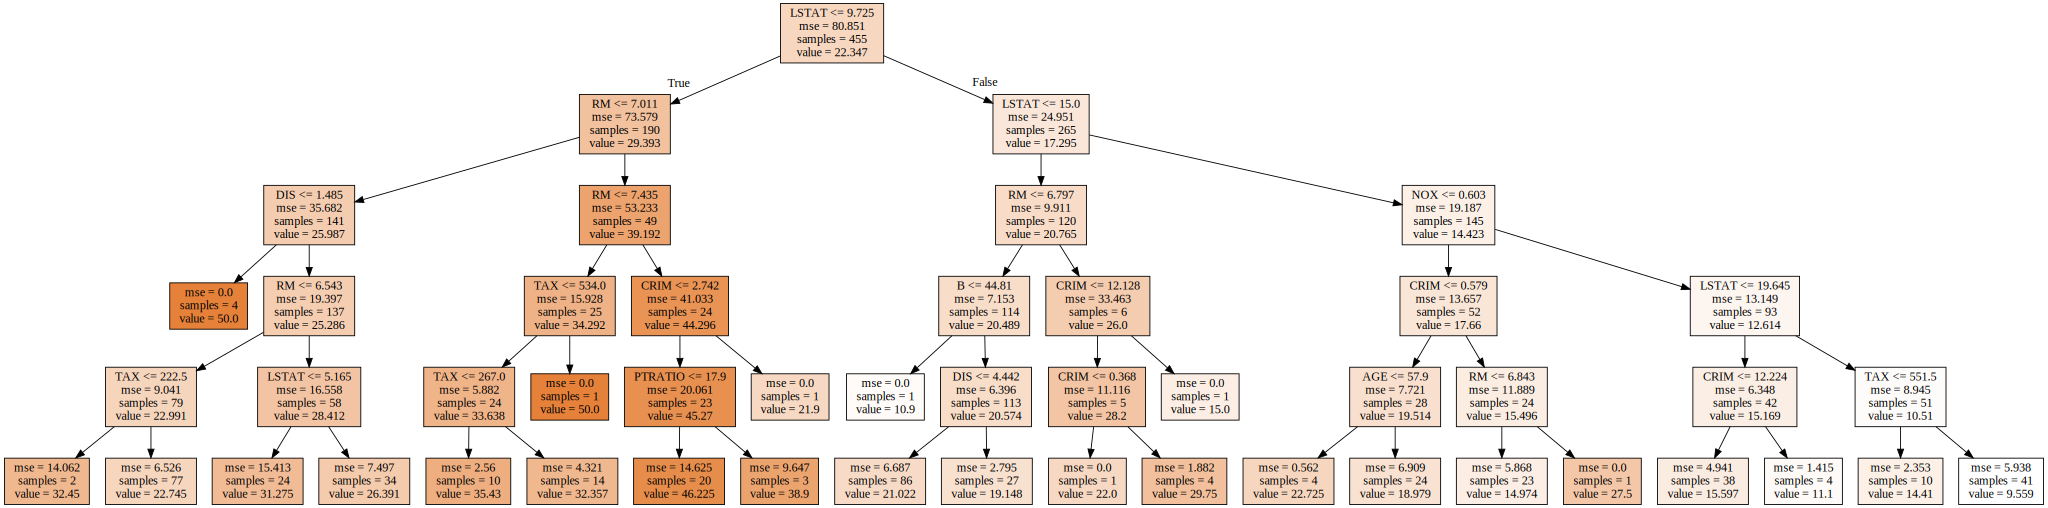

In [36]:
import graphviz
from sklearn.tree import export_graphviz
g = export_graphviz(reg,
                    feature_names=boston["feature_names"],
                    filled=True)
graphviz.Source(g) #gini係數=(1-(猜錯的程度、機率)) 越來越小  P1(1-P1)+P2(1-P2)

In [37]:
pre = reg.predict(x_test)
pre

array([50.        , 19.14814815, 15.59736842, 21.02209302, 21.02209302,
       15.59736842, 21.02209302,  9.55853659, 46.225     , 46.225     ,
       22.74545455, 10.9       , 35.43      , 15.59736842, 38.9       ,
        9.55853659, 46.225     , 18.97916667, 19.14814815, 15.59736842,
       18.97916667, 21.02209302, 18.97916667, 22.74545455, 31.275     ,
       22.74545455, 22.74545455,  9.55853659, 46.225     , 35.43      ,
       18.97916667, 46.225     , 18.97916667, 22.74545455, 35.43      ,
       22.74545455, 21.02209302, 22.74545455,  9.55853659, 21.02209302,
       21.02209302, 22.74545455, 18.97916667,  9.55853659, 26.39117647,
       26.39117647, 15.59736842, 31.275     , 19.14814815, 21.02209302,
       15.59736842])